In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [29]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [30]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [31]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [32]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

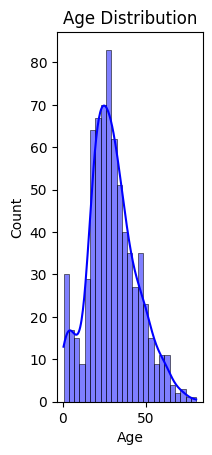

In [33]:
plt.subplot(1, 3, 1)
sns.histplot(df['Age'].dropna(), bins=25, kde=True, color="blue")
plt.title("Age Distribution")

Text(0.5, 1.0, 'Fare Distribution')

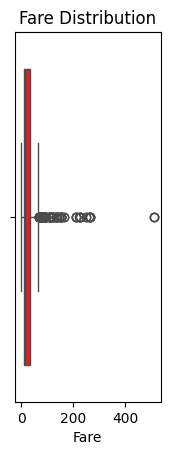

In [34]:
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Fare'], color="red")
plt.title("Fare Distribution")

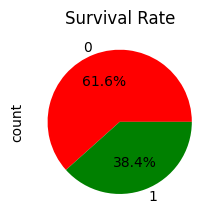

In [35]:
plt.subplot(1, 3, 3)
df['Survived'].value_counts().plot.pie(autopct="%1.1f%%", colors=["red", "green"])
plt.title("Survival Rate")
plt.tight_layout()
plt.show()

In [36]:
survived_female_first_class = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].mean()
print(f"\nProbability of survival for a Female in First Class: {survived_female_first_class:.2f}")



Probability of survival for a Female in First Class: 0.97


In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 800x600 with 0 Axes>

In [ ]:
#Correlation heatmapCorrelation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 800x600 with 0 Axes>

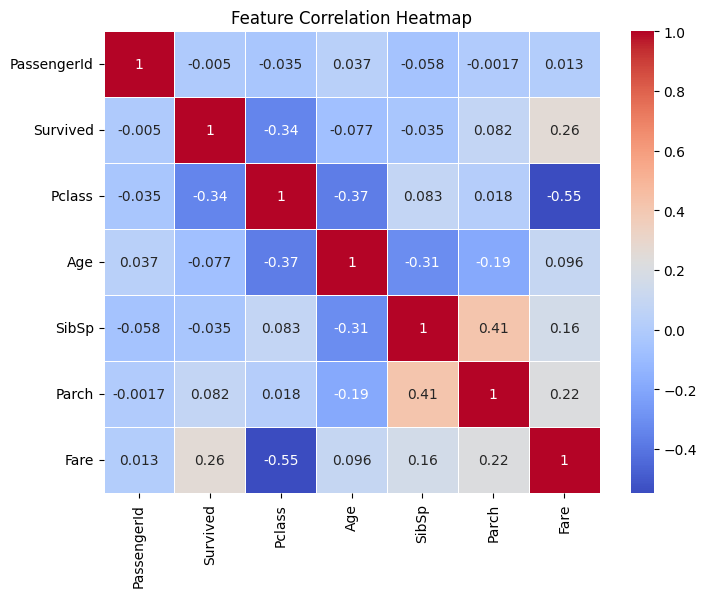

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df contains only numeric columns
df_numeric = df.select_dtypes(include=["number"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Separate the fares for survived and not survived passengers
fare_survived = df[df['Survived'] == 1]['Fare']
fare_not_survived = df[df['Survived'] == 0]['Fare']

# Perform an independent T-test
t_stat, p_value = stats.ttest_ind(fare_survived, fare_not_survived, nan_policy='omit')

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in the mean fare between passengers who survived and those who did not.")
else:
    print("There is no statistically significant difference in the mean fare between passengers who survived and those who did not.")

T-statistic: 7.94
P-value: 0.0000
There is a statistically significant difference in the mean fare between passengers who survived and those who did not.


In [ ]:
fare_survived = df[df['Survived'] == 1]['Fare']
fare_not_survived = df[df['Survived'] == 0]['Fare']

In [ ]:
if p_value < 0.05:
    print("Reject Null Hypothesis: Fare significantly affects survival.")
else:
    print("Fail to Reject Null Hypothesis: No significant effect of fare on survival.")

Reject Null Hypothesis: Fare significantly affects survival.


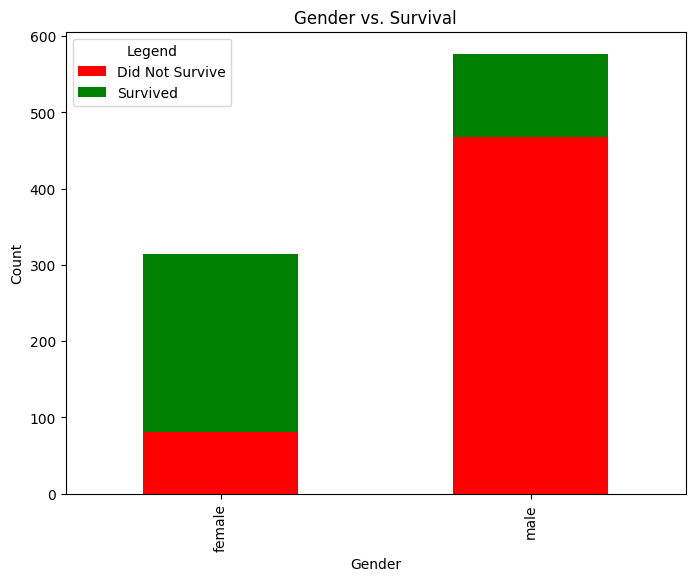

In [ ]:
# Calculate survival counts grouped by gender
gender_survival = df.groupby('Sex')['Survived'].value_counts().unstack()

# Plot the bar chart
gender_survival.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'green'])
plt.title('Gender vs. Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'], title='Legend')
plt.show()

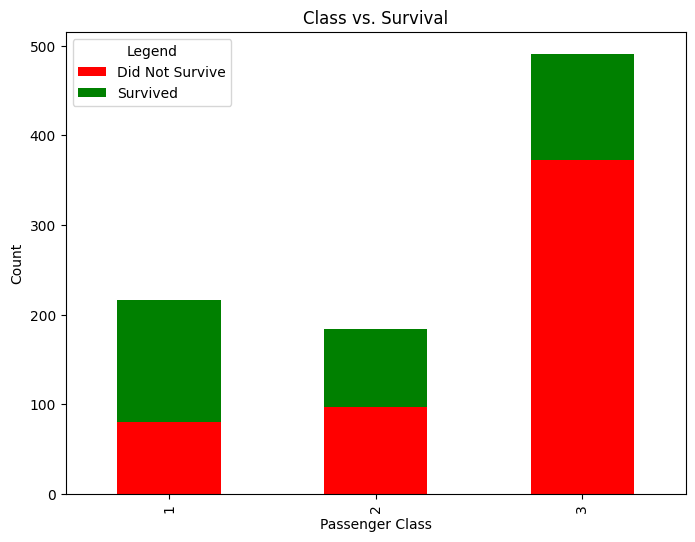

In [ ]:
# Calculate survival counts grouped by class
class_survival = df.groupby('Pclass')['Survived'].value_counts().unstack()

# Plot the bar chart
class_survival.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'green'])
plt.title('Class vs. Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'], title='Legend')
plt.show()

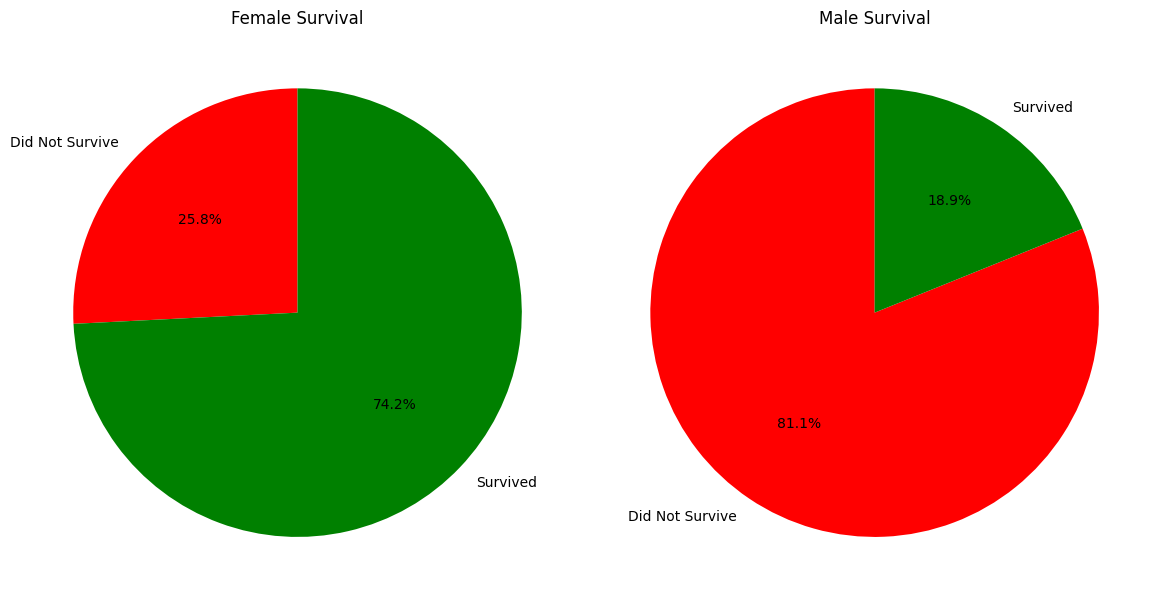

In [ ]:
# Plot pie charts for survival distribution by gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Female survival
gender_survival.loc['female'].plot.pie(
    ax=axes[0], autopct='%1.1f%%', startangle=90, colors=['red', 'green'], labels=['Did Not Survive', 'Survived']
)
axes[0].set_title('Female Survival')
axes[0].set_ylabel('')

# Male survival
gender_survival.loc['male'].plot.pie(
    ax=axes[1], autopct='%1.1f%%', startangle=90, colors=['red', 'green'], labels=['Did Not Survive', 'Survived']
)
axes[1].set_title('Male Survival')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate standard deviation for numerical features
numerical_variation = df_numeric.std().sort_values(ascending=False)
print("Numerical Features with Highest Variation:")
print(numerical_variation)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

Numerical Features with Highest Variation:
PassengerId    257.353842
Fare            49.693429
Age             14.526497
SibSp            1.102743
Pclass           0.836071
Parch            0.806057
Survived         0.486592
dtype: float64

Missing Values in Each Column:
Age         177
Cabin       687
Embarked      2
dtype: int64


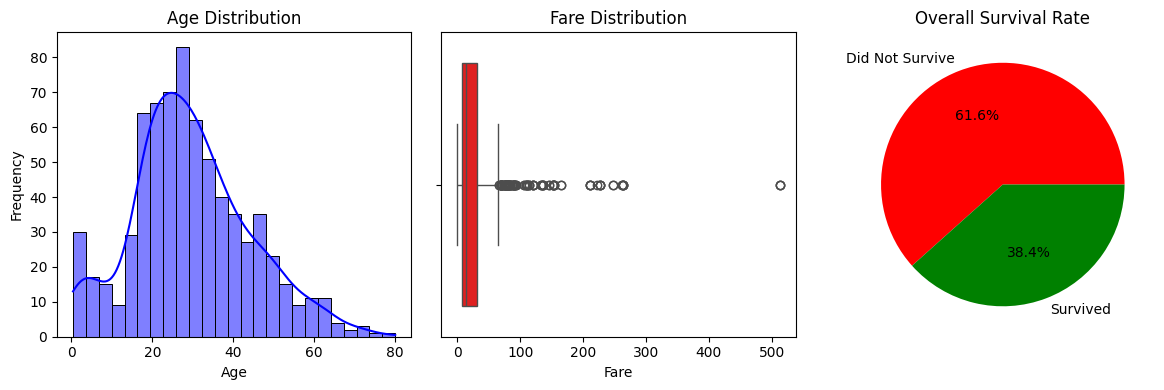

In [39]:
# Age Distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'].dropna(), bins=25, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Fare Distribution
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Fare'], color="red")
plt.title("Fare Distribution")
plt.xlabel("Fare")

# Overall Survival Rate
plt.subplot(1, 3, 3)
df['Survived'].value_counts(normalize=True).plot.pie(
    autopct="%1.1f%%", colors=["red", "green"], labels=["Did Not Survive", "Survived"]
)
plt.title("Overall Survival Rate")
plt.ylabel("")

plt.tight_layout()
plt.show()

In [40]:
# Calculate the probability of survival for a male in third class
survived_male_third_class = df[(df['Sex'] == 'male') & (df['Pclass'] == 3)]['Survived'].mean()
print(f"Probability of survival for a Male in Third Class: {survived_male_third_class:.2f}")

Probability of survival for a Male in Third Class: 0.14
